# Business Problem

###  You are an HR analyst at GooDHire company, and one of your tasks is to determine which factors keep employees at my company and which prompt others to leave.
###  You need to know what factors I can change to prevent the loss of good people.


### Data has various data points on our employees, but you are most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And you want to understand how this relates to workforce attrition.
### Education : 1 'Below College' , 2 'College' , 3 'Bachelor', 4 'Master' , 5 'Doctor'
### Environment Satisfaction : 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
### Job Involvement : 1 'Low' , 2 'Medium', 3 'High' , 4 'Very High'
### Job Satisfaction : 1 'Low' , 2 'Medium' , 3 'High' , 4 'Very High'
### Performance Rating : 1 'Low' , 2 'Good' , 3 'Excellent' , 4 'Outstanding'
### Relationship Satisfaction : 1 'Low' , 2 'Medium' , 3 'High' , 4 'Very High'
### WorkLife Balance : 1 'Bad' , 2 'Good' , 3 'Better' , 4 'Best

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
employee = pd.read_csv('Employees data.csv')

In [3]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee.describe()
# if std dev is 0, it means there is only one value in whole column so we will drop it 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
employee.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
employee=employee.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [7]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
## decision tree is not sensitive to outliers as it will split the data on basis of certain criteria. 
##outliers does not make any impact 

In [10]:
employee['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [12]:
employee['Attrition']=labelencoder.fit_transform(employee['Attrition'])

In [13]:
employee['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [14]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [15]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

In [16]:
## separate the numerical data 


In [17]:
employee_num=employee.select_dtypes(include=[np.number]).copy()

In [18]:
employee_character=employee.select_dtypes(include='object').copy()

In [19]:
employee_character.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [20]:
empolyee_dummies=pd.get_dummies(employee_character)

In [21]:
empolyee_dummies

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [22]:
employee_combined=pd.concat([employee_num,empolyee_dummies],axis=1)

# Splitting the data into X and Y

In [23]:
X=employee_combined.drop(['Attrition'],axis=1)
Y=employee_combined['Attrition']

# Splitting the data into training and test data 

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=20)

# Build model- Decision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
Y_pred=model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[361  10]
 [ 56  14]]


In [28]:
from sklearn import metrics
metrics.accuracy_score(Y_test,Y_pred)

0.8503401360544217

In [29]:
##feature importance -  which variable is more imp 
col_importance = pd.concat([pd.Series(X_train.columns),pd.Series(model.feature_importances_)],axis=1,keys=['Column','Coefficient'])
col_importance.sort_values(by='Coefficient',ascending=False).head(5)

,Column,Coefficient
49,OverTime_No,0.507725
9,MonthlyIncome,0.286018
16,TotalWorkingYears,0.206256
0,Age,0.000000
38,JobRole_Human Resources,0.000000


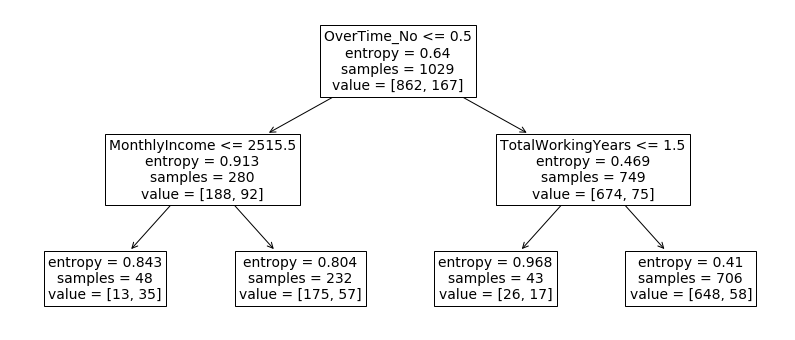

In [30]:
from sklearn import tree
plt.figure(figsize=(14,6))
tree.plot_tree(model,feature_names=X_train.columns.values);
plt.savefig('Sampletree.jpeg')

In [31]:
# hard predictions 
y_pred=model.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [33]:
# soft predictions 
model.predict_proba(X_test)

array([[0.75431034, 0.24568966],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.75431034, 0.24568966],
       [0.27083333, 0.72916667],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.27083333, 0.72916667],
       [0.91784703, 0.08215297],
       [0.75431034, 0.24568966],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.75431034, 0.24568966],
       [0.60465116, 0.39534884],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.91784703, 0.08215297],
       [0.60465116, 0.39534884],
       [0.75431034, 0.24568966],
       [0.91784703, 0.08215297],
       [0.

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
print('Area under ROC curve:',roc_auc)

Area under ROC curve: 0.6658259530227185


In [35]:
# if we change the threshold, soft prediction willremain same but hard prediction will chnage 

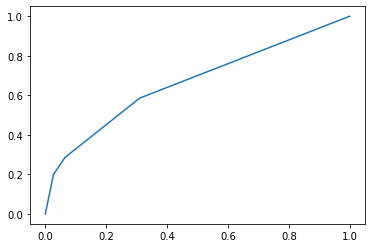

In [36]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(Y_test,model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr)

# Decision tree implementation

In [37]:
# underfitting of the data 
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='entropy',
                                      class_weight='balanced',
                                       max_depth=1,
                                      random_state=15)

dt_model.fit(X_train, Y_train)

Y_pred_test = dt_model.predict(X_test)
    Y_pred_train = dt_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.7444120505344995
Accuracy Test: 0.691609977324263


In [38]:
## overfitting of data as we have removed the max depth 
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='entropy',
                                      class_weight='balanced',
                                      random_state=15)

dt_model.fit(X_train, Y_train)

Y_pred_test = dt_model.predict(X_test)
Y_pred_train = dt_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 1.0
Accuracy Test: 0.7959183673469388


In [39]:
## overfitting and varianve error due to max depth 
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(criterion='entropy',
                                      class_weight='balanced',
                                       max_depth=15,
                                      random_state=15)

dt_model.fit(X_train, Y_train)

Y_pred_test = dt_model.predict(X_test)
Y_pred_train = dt_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.9980563654033042
Accuracy Test: 0.7959183673469388


# Model building through Random Forest

In [40]:
from sklearn import*
rf_model = ensemble.RandomForestClassifier(n_estimators=150,criterion='entropy',
                                          class_weight='balanced',
                                           max_leaf_nodes=12,
                                          random_state=15)
rf_model.fit(X_train, Y_train)

Y_pred_test = rf_model.predict(X_test)
Y_pred_train = rf_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.8551992225461613
Accuracy Test: 0.782312925170068


## RandomsearchCV

In [41]:
model_params={'n_estimators':[148,145,150,155,160],
              'max_leaf_nodes':range(10,20),
              'criterion':['gini','entropy']}

In [42]:
rf_model=ensemble.RandomForestClassifier(random_state=15)

In [43]:
random_search_object=model_selection.RandomizedSearchCV(rf_model,model_params,n_iter=10,cv=3,random_state=15)

In [44]:
random_search_best_model=random_search_object.fit(X_train,Y_train)

In [45]:


Y_pred_test = random_search_best_model.predict(X_test)
Y_pred_train = random_search_best_model.predict(X_train)

print('Accuracy Train:',metrics.accuracy_score(Y_train,Y_pred_train))
print('Accuracy Test:',metrics.accuracy_score(Y_test,Y_pred_test))

Accuracy Train: 0.8765792031098154
Accuracy Test: 0.8571428571428571


In [46]:
random_search_best_model.best_params_

{'n_estimators': 145, 'max_leaf_nodes': 17, 'criterion': 'gini'}

## Grid search

In [47]:
# Grid search try aout all possible combination of all hyper parametres
# random  search try aout n iteration  combination out of allcombination hyper parametres
grid_search_object=model_selection.GridSearchCV(rf_model,model_params,cv=3)


In [48]:
grid_search_object_model=random_search_object.fit(X_train,Y_train)